### 1. About the data set

In [7]:
#Load the dataset
import pandas as pd 
dataset = pd.read_csv('tweets.csv', encoding = 'ISO-8859-1')

dataset.head(2)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False


Focus on only Text column and ignore rest at this moment

### 2. Generating Word Frequency

In [8]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(dataset.text.str)

RT                    11053
to                     7650
is                     5152
in                     4491
the                    4331
                      ...  
function.                 1
see!!!!                   1
Possibly                  1
Secretary,Economic        1
.@suraj_agarwal_          1
Length: 19601, dtype: int64

In [9]:
gen_freq(dataset.text.str)

RT                    11053
to                     7650
is                     5152
in                     4491
the                    4331
                      ...  
function.                 1
see!!!!                   1
Possibly                  1
Secretary,Economic        1
.@suraj_agarwal_          1
Length: 19601, dtype: int64

### 3. EDA using Word Clouds

In [10]:
# pip install wordcloud

In [11]:
word_freq = gen_freq(dataset.text.str)

In [12]:
word_freq

RT                    11053
to                     7650
is                     5152
in                     4491
the                    4331
                      ...  
function.                 1
see!!!!                   1
Possibly                  1
Secretary,Economic        1
.@suraj_agarwal_          1
Length: 19601, dtype: int64

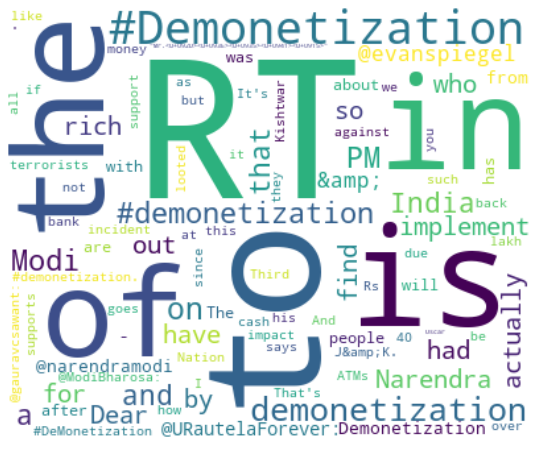

In [8]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Text Cleaning

In [9]:
import re

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

### Removal of Stopwords

In [10]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{"where's", 'any', 'themselves', 'all', 'her', "that's", 'as', 'how', 'yourself', 'with', "can't", "there's", 'no', 'not', "shan't", 'by', 'that', "he's", 'off', "we'll", "what's", 'nor', 'they', "hadn't", "we're", "hasn't", 'in', 'into', "they'll", "i'll", "i'd", "why's", 'down', 'like', 'but', 'does', 'below', 'doing', 'who', 'our', 'www', 'also', "mustn't", 'than', "weren't", 'he', 'being', "haven't", 'yours', 'after', 'theirs', 'here', 'me', 'few', 'above', 'their', 'have', 'ourselves', "you'd", 'if', "she'd", 'your', 'could', 'a', 'do', 'about', 'whom', "wasn't", 'from', 'where', "it's", 'through', 'were', 'once', 'him', 'we', "didn't", 'most', "don't", 'his', 'further', 'is', 'ever', "i've", 'before', 'you', 'com', 'so', 'more', 'both', "wouldn't", 'and', "we've", 'hers', 'therefore', 'ours', "doesn't", 'each', 'r', 'while', 'other', 'are', 'it', 'until', 'been', 'when', 'those', 'would', 'yourselves', 'had', 'myself', 'of', 'under', 'ought', "you're", 'am', "won't", 'herself', "

Now, we call clean_text() and gen_freq() to perform cleaning and frequency computation operation

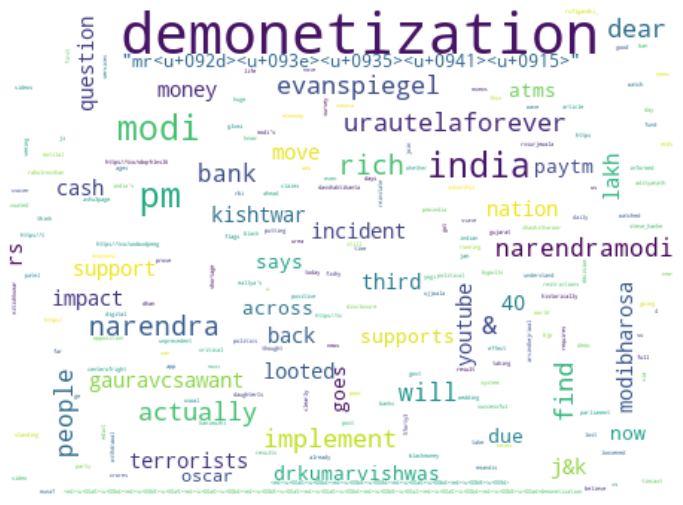

In [11]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()